In [1]:
import torch.nn as nn

from datasets import *
from evaluation import *
from models import *
from pruning.unstructured import *
from pruning.structured import *

c:\Users\prabh\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\prabh\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Importing C:\Users\prabh\Smart-pruner-dev\pruning\unstructured\L1norm.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\Train.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\unstructured\random.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\decay_pruning.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\two_to_four.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Thinet.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Global_pruning.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Ln_structured.py


In [2]:
dataset = MNIST()
train_loader, test_loader = dataset.get_dataloader()

In [3]:
#train model and return it
model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = Trainer(model, 10, train_loader, criterion, optimizer)
original_model = model.train()
print("Accuracy of original model : ", accuracy(original_model, test_loader))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5.0089 | 
Epoch: 2 | train_loss: 3.5799 | 
Epoch: 3 | train_loss: 3.2495 | 
Epoch: 4 | train_loss: 2.9985 | 
Epoch: 5 | train_loss: 2.7616 | 
Epoch: 6 | train_loss: 2.5437 | 
Epoch: 7 | train_loss: 2.3832 | 
Epoch: 8 | train_loss: 2.2258 | 
Epoch: 9 | train_loss: 2.0089 | 
Epoch: 10 | train_loss: 1.8032 | 
Accuracy of original model :  [98.85]


In [4]:
#for UnstructuredL1normPrune

# model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = UnstructuredL1normPrune(original_model, 5, train_loader, criterion, optimizer, 0.5)

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [5]:
# print("Accuracy of original model : ", accuracy(original_model, test_loader))
# print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
# print("Number of non zero weights in original model : ", non_zero_weights(original_model))
# print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
# print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of pruned model :  [98.82]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  40224
Compression Ratio :  1.0985978520286397
Accuracy of pruned model :  [98.55]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  31386
Compression Ratio :  1.4079525903268972
Accuracy of pruned model :  [97.35]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  22548
Compression Ratio :  1.9598190526875998
Accuracy of pruned model :  [65.14]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  13710
Compression Ratio :  3.2231947483588623
Accuracy of pruned model :  [9.8]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  4872
Compression Ratio :  9.070197044334975


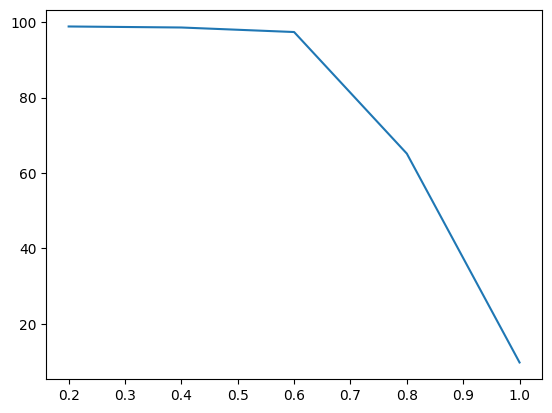

In [6]:
li=[0.2,0.4,0.6,0.8,1.0]
acc = []
for i in li:
    trainer = DecayPrune(original_model, 5, train_loader, criterion, optimizer,i,0.05,False)
    pruned_model = trainer.prune_model()
    accur = accuracy(pruned_model, test_loader)
    acc.append(accur)
    print("Accuracy of pruned model : ", accur)
    print("Number of non zero weights in original model : ", non_zero_weights(original_model))
    print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
    print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

import matplotlib.pyplot as plt
plt.plot(li, acc)

Accuracy of pruned model :  [98.86]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  39318
Compression Ratio :  1.1239127117350831
Accuracy of pruned model :  [98.79]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  30480
Compression Ratio :  1.4498031496062993
Accuracy of pruned model :  [98.26]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  21642
Compression Ratio :  2.0418630440809538
Accuracy of pruned model :  [93.52]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  12804
Compression Ratio :  3.451265229615745
Accuracy of pruned model :  [9.82]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  3966
Compression Ratio :  11.142208774583963


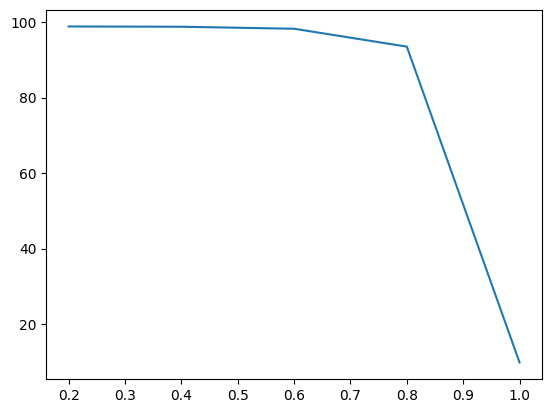

In [9]:
li=[0.2,0.4,0.6,0.8,1.0]
acc = []
for i in li:
    trainer = DecayPrune(original_model, 5, train_loader, criterion, optimizer,i,0.05,True)
    pruned_model = trainer.prune_model()
    accur = accuracy(pruned_model, test_loader)
    acc.append(accur)
    print("Accuracy of pruned model : ", accur)
    print("Number of non zero weights in original model : ", non_zero_weights(original_model))
    print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
    print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

import matplotlib.pyplot as plt
plt.plot(li, acc)

In [ ]:
#for Decay pruning with reverse=False
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = DecayPrune(original_model, 5, train_loader, criterion, optimizer, 0.8, 0.05,
                     False)  #init pruning rate = 0.5, decay = 0.1

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [8]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.85]


KeyboardInterrupt: 

In [ ]:
#for Decay pruning with reverse=True
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = DecayPrune(original_model, 5, train_loader, criterion, optimizer, 0.8, 0.05,
                     True)  #init pruning rate = 0.5, decay = 0.1

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.72]
Accuracy of pruned model :  [98.58]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  23851
Compression Ratio :  0.5397374971713057


In [ ]:
#two to four pruning
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = two_to_four_prune(original_model, 5, train_loader, criterion, optimizer)

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.72]
Accuracy of pruned model :  [36.5]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  22350
Compression Ratio :  0.5057705363204344


In [ ]:
#random pruning -- weights
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = RandomUnstructured(original_model, 5, train_loader, criterion, optimizer,0.5)

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.72]
Accuracy of pruned model :  [72.42]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  22095
Compression Ratio :  0.5


In [ ]:
#global pruning 
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = GlobalPrune(original_model, 5, train_loader, criterion, optimizer,0.5)

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.72]
Accuracy of pruned model :  [98.65]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  22095
Compression Ratio :  0.5


In [ ]:
#Ln structured pruning
#Prune tensor by removing channels with the lowest Ln-norm along the specified dimension.
#model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)
trainer = LnStructuredPrune(original_model, 5, train_loader, criterion, optimizer,0.5,2,1) #2 is the norm value,1 is dim

#train and prune the model and return both the original and pruned model
#original_model, pruned_model = trainer.train_prune_retrain()
pruned_model = trainer.prune_model()

In [ ]:
print("Accuracy of original model : ", accuracy(original_model, test_loader))
print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
print("Number of non zero weights in original model : ", non_zero_weights(original_model))
print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
print("Compression Ratio : ", compression_ratio(original_model, pruned_model))

Accuracy of original model :  [98.72]
Accuracy of pruned model :  [50.12]
Number of non zero weights in original model :  44190
Number of non zero weights in pruned model :  22170
Compression Ratio :  0.5016972165648337


In [ ]:
#Thinet
original_model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

trainer = Thinet(original_model, 5, train_loader, criterion, optimizer,amount=0.5)  #init amount = 0.2(no of channels)

#train and prune the model and return both the original and pruned model
pruned_model = trainer.prune_model()

In [ ]:
# print("Accuracy of original model : ", accuracy(original_model, test_loader))
# print("Accuracy of pruned model : ", accuracy(pruned_model, test_loader))
# print("Number of non zero weights in original model : ", non_zero_weights(original_model))
# print("Number of non zero weights in pruned model : ", non_zero_weights(pruned_model))
# print("Compression Ratio : ", compression_ratio(original_model, pruned_model))